## The Birthday Problem

We can use the _compliment_ of the following to simulate the probability that $n$ people share a birthday in a room with $k$ people:
$${{n!}\over{(n-k)!}} \cdot n^{-k}$$
<br>
In python, we can avoid factorials and evaulate the expression using: 
$${{n-1}\over n}\cdot {{n-2}\over n}\cdots{{n-k+1}\over n}$$
<br>
Additionally, when $k$ is small in comparison to $n$, the probability above is very well approximated by the following formula:
$$e^{{-(k-1)^2}/{(2n)}}$$


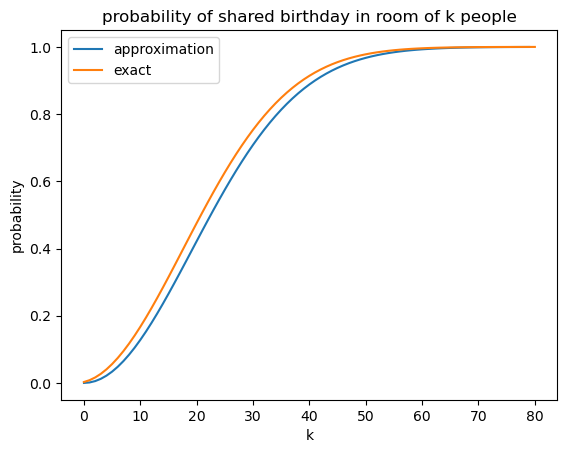

In [26]:
#n=365, k ranges 1-80
import pylab as pl
import math
n=365
exp = []
approx = []
exact = []
temp = []
tempvar = 0

#make approx data
for k in range(1,81):
    exp.append((-((k-1)**2))/(2*n))
approx = pl.exp(exp)
for i in range(len(approx)):
    approx[i] = 1 - approx[i]

#make the exact data
for k in range(1, 82):
    temp.append((n-k)/n)
    tempvar = pl.cumprod(temp)
    exact.append(tempvar[len(tempvar)-1])
for i in range(len(exact)):
    exact[i] = 1 - exact[i]
     
#plot both
pl.plot(approx, label="approximation")
pl.plot(exact, label="exact")
pl.ylabel("probability")
pl.xlabel("k")
pl.title("probability of shared birthday in room of k people")
pl.legend()
pl.show()

As we can see, the approximation is _very_ close to actual formula. However, we are using a theoretical uniform distrubution. In reality, this is impossible, so lets use real birth data from 2003--the year I was born--to create a realistic distribution. (Data from FiveThirtyEight.com)<br>
<br>
First, lets visualize the real data in a scatter plot:

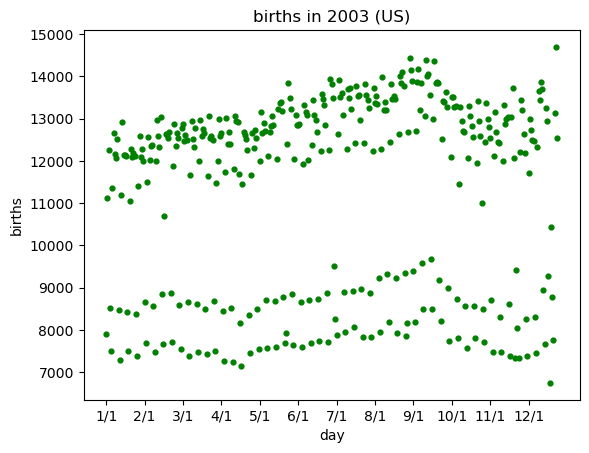

In [27]:
import csv
def get_data():
    d=[]
    f=open('2003births.csv',newline='')
    reader=csv.reader(f)
    for item in reader:
        d.append(item)
    d[0][0]='2003'
    return d
data = get_data()
births = []
days = []
for i in range(len(data)):
    births.append(int(data[i][3]))
days = pl.arange(1,366)
pl.scatter(days, births,color='green', s=12)
pl.title("births in 2003 (US)")
pl.ylabel("births")
pl.xlabel("day")
pl.xticks(pl.arange(1,366,31),["1/1","2/1","3/1","4/1","5/1","6/1","7/1","8/1","9/1","10/1","11/1","12/1"])
pl.show()

Now we'll superimpose the real data from 2003 to our original graph

In [28]:
#CODE FOR ORIGINAL PLOT
n=365
exp = []
approx = []
exact = []
temp = []
tempvar = 0

## make the approximation (approx) array
for k in range(1,81):
    exp.append((-((k-1)**2))/(2*n))
approx = pl.exp(exp)
for i in range(len(approx)):
    approx[i] = 1 - approx[i]

## make the exact array
for k in range(1, 82):
    temp.append((n-k)/n)
    tempvar = pl.cumprod(temp)
    exact.append(tempvar[len(tempvar)-1])
for i in range(len(exact)):
    exact[i] = 1 - exact[i]

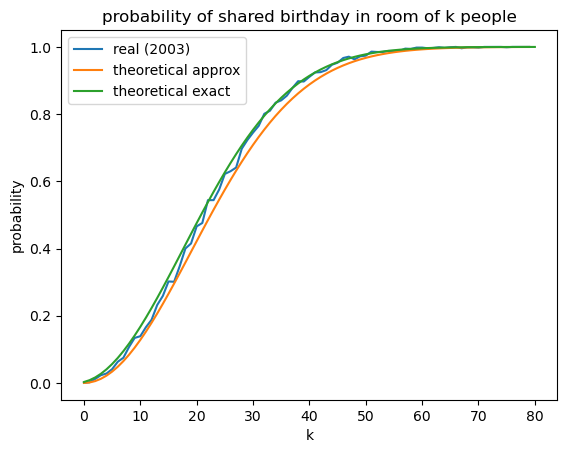

In [29]:
#CODE FOR SUPERIMPOSITION 
s = sum(births)
# make the birthday probability = 1 for choice function. 
for i in range(len(births)):
    births[i] = births[i]/s

match = []
for trial in range(0,1000):
    temp = []
    for k in range (1,81):
        arr = pl.choice(days, p=births, size = k) 
        if len(pl.unique(arr)) != len(arr):
            temp.append(1)
        else:
            temp.append(0)
    match.append(temp)

prob = pl.mean(match, axis=0)

pl.plot(prob, label="real (2003)")
pl.plot(approx, label="theoretical approx")
pl.plot(exact, label="theoretical exact")
pl.ylabel("probability")
pl.xlabel("k")
pl.title("probability of shared birthday in room of k people")
pl.legend()
pl.show()